# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: None

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_train.npy', mmap_mode='r')

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_val.npy', mmap_mode='r')

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_test.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_test.npy',  mmap_mode='r')

classWeights = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_weights_train.npy')
print(f"class weights: {classWeights}\n")

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)

print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)

print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

train_gen = ResNetDataGenerator(_X=X_train, _y=Y_train, batch_size=512)
val_gen =   ResNetDataGenerator(_X=X_val,   _y=Y_val,   batch_size=512)
test_gen =  ResNetDataGenerator(_X=X_test,  _y=Y_test,  batch_size=512)

class weights: [ 0.52035594 12.78142637]

Y_train:
Counter({0.0: 95746, 1.0: 3898})
(99644, 100, 100)
(99644,)

Y_val:
Counter({0.0: 31975, 1.0: 1240})
(33215, 100, 100)
(33215,)

Y_test:
Counter({0.0: 31916, 1.0: 1299})
(33215, 100, 100)
(33215,)


## Build & train keras model

In [5]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(100, 100, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.95)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=8,
                    verbose=True,
                    validation_data=val_gen
                   )

Epoch 1/8
195/195 [==============================] - 106s 542ms/step - loss: 0.3365 - accuracy: 0.9561 - val_loss: 77590.3125 - val_accuracy: 0.9627
Epoch 2/8
195/195 [==============================] - 104s 536ms/step - loss: 0.1629 - accuracy: 0.9609 - val_loss: 0.1574 - val_accuracy: 0.9627
Epoch 3/8
195/195 [==============================] - 104s 536ms/step - loss: 0.1622 - accuracy: 0.9609 - val_loss: 0.1562 - val_accuracy: 0.9627
Epoch 4/8
195/195 [==============================] - 105s 537ms/step - loss: 0.1588 - accuracy: 0.9609 - val_loss: 0.1585 - val_accuracy: 0.9627
Epoch 5/8
195/195 [==============================] - 105s 537ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0515 - val_accuracy: 0.9773
Epoch 6/8
195/195 [==============================] - 105s 536ms/step - loss: 0.0156 - accuracy: 0.9968 - val_loss: 0.1146 - val_accuracy: 0.9746
Epoch 7/8
195/195 [==============================] - 105s 538ms/step - loss: 0.0090 - accuracy: 0.9984 - val_loss: 0.0266 - va

## Evaluation

Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     31916
         1.0       0.88      0.99      0.93      1299

    accuracy                           0.99     33215
   macro avg       0.94      0.99      0.96     33215
weighted avg       0.99      0.99      0.99     33215

Confusion matrix:
[[31738   178]
 [   12  1287]]

Confusion matrix (Percentages):
[[9.5553e+01 5.3600e-01]
 [3.6000e-02 3.8750e+00]]

Metrics:
Sensitivity (TPR): 0.990762
Specifity (TNR):   0.994423

FPR: 0.005577
FNR: 0.009238

Balanced accuracy: 0.992592

Test loss:	0.038905
Test accuracy:	0.994280


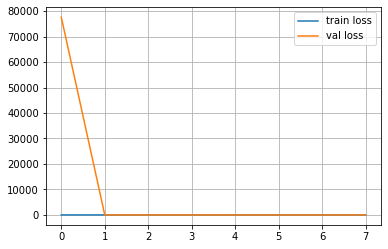

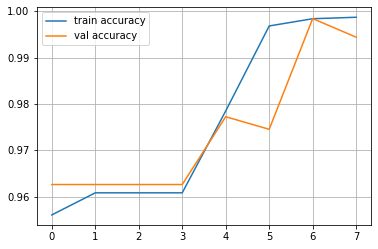

In [6]:
Y_pred = numpy.argmax( model.predict_generator(test_gen) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [1]:
model.save('ResNet_word2vec.h5')

NameError: name 'model' is not defined